# Random Forest

## Importing the libraries

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Importing the dataset

In [7]:
#breast cancer data set where 0 is benigin(not cancerous tumor) and 1 is malignant(cancerous tumor)
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Training Random Forest on the Training set

In [9]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

## Making the Confusion Matrix

0.9635036496350365

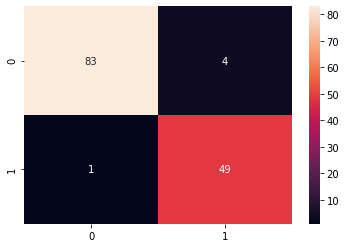

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test, y_pred)

## Applying k-Fold Cross Validation

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.52 %
Standard Deviation: 3.01 %


In [12]:
#from the confusion matrix
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0] / (cm[0][0] + cm[1][0])
f1_score = (2*recall*precision)/(precision+recall)

In [13]:
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

Precision:  0.9540229885057471
Recall:  0.9880952380952381
F1-Score:  0.9707602339181286


### Grid search CV to find better parameters

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = param_grid = {'max_depth': [1,3, 5,7,9,10],
               'min_samples_split': [2, 5, 10,20,30]}

grid_search = GridSearchCV(
    estimator=classifier,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = -1, # use all available processors
    cv = 10,
    verbose=True,
    refit=True
)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    3.9s finished


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=10),
             n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 10],
                         'min_samples_split': [2, 5, 10, 20, 30]},
             scoring='roc_auc', verbose=True)

In [15]:
grid_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_split=5,
                       n_estimators=10)

In [16]:
grid_search.best_params_

{'max_depth': 5, 'min_samples_split': 5}

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

0.9708029197080292

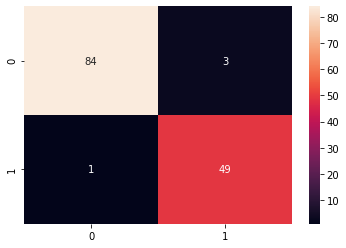

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)
accuracy_score(y_test, y_pred)

In [20]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 96.52 %
Standard Deviation: 2.52 %


In [21]:
#from the confusion matrix
precision = cm[0][0]/(cm[0][0] + cm[0][1])
recall = cm[0][0] / (cm[0][0] + cm[1][0])
f1_score = (2*recall*precision)/(precision+recall)

In [22]:
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1_score)

Precision:  0.9655172413793104
Recall:  0.9882352941176471
F1-Score:  0.9767441860465116
